In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [6]:
dados = pd.read_csv('datanvda.csv')
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
...,...,...,...,...,...,...,...
6117,2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600
6118,2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500
6119,2023-05-17,295.839996,301.989990,294.299988,301.779999,301.779999,43253500
6120,2023-05-18,304.100006,318.279999,303.200012,316.779999,316.779999,74872500


In [7]:
dados = dados.drop(['Date'], axis=1)

indices = [6120, 6121]

for indice in indices:
    dados = dados.drop(indice)
dados

,Open,High,Low,Close,Adj Close,Volume
0,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
2,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
3,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
4,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
...,...,...,...,...,...,...
6115,288.959991,289.500000,282.459991,285.779999,285.779999,32214900
6116,285.290009,287.799988,280.459991,283.399994,283.399994,27402700
6117,285.079987,289.690002,281.519989,289.529999,289.529999,29392600
6118,288.410004,298.700012,288.320007,292.130005,292.130005,44940500


In [8]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03
mean,31.992438,32.605256,31.362510,32.013185,31.753605,6.128436e+07
std,61.785604,63.030107,60.487347,61.822216,61.827458,4.401457e+07
min,0.348958,0.355469,0.333333,0.341146,0.313034,1.968000e+06
25%,2.677292,2.757292,2.603125,2.677500,2.456865,3.437550e+07
50%,4.317500,4.412500,4.245000,4.332500,3.978928,5.138220e+07
75%,27.523125,27.891875,27.051249,27.460000,27.072850,7.456580e+07
max,335.170013,346.470001,320.359985,333.760010,333.350800,9.230856e+08


Análise de Multicolinearidade - Acima de 0.7 ---- Crítico

In [9]:
colunas = ['Open', 'High', 'Low']
dados[colunas].corr()

,Open,High,Low
Open,1.000000,0.999794,0.999786
High,0.999794,1.000000,0.999744
Low,0.999786,0.999744,1.000000


In [64]:
#Feature Engineering
colunas = ['Open', 'High', 'Low']
x_train = dados[colunas]
y_train = dados['Close']

Validação Cruzada - KFolds

In [42]:
num_iterations = 4
quartil_size = len(x_train) // num_iterations # = 50
partitions = [x_train[i:i+quartil_size] for i in range(0, len(x_train), quartil_size)]
#Cria uma lista que contém todos os Quartis, dividos por 4 (25%) ---- X 
target_predictions = [y_train[i:i+quartil_size] for i in range(0, len(y_train), quartil_size)]
#Cria uma lista que contém todos os Quartis, divididos por 4 (25%) ---- Y 

In [43]:
#Validação Cruzada
mse_scoretrain = []
mse_scoretest = []  #Cria dicionários vazios

for i in range(num_iterations): #Cria um laço que se repete 4 vezes.
    
    x_test, y_test = partitions[i], target_predictions[i] #Chama X(partitions[i]) e Y(target_predictions[1]) de variáveis de teste.
    x_train = np.vstack(partitions[:i] + partitions[i+1:])
    y_train = np.concatenate(target_predictions[:i] + target_predictions[i+1:])
    
    
    modelo = LinearRegression()
    modelo.fit(x_train, y_train)
    y_predtrain = modelo.predict(x_train) #Previsão do treino
    
    y_pred = modelo.predict(x_test) #Previsão do Teste 
    
    #Erros Quadráticos Médios
    msetrain = mean_squared_error(y_train, y_predtrain) #Erro Quadrático médio do Treino
    msetest = mean_squared_error(y_test, y_pred) #Erro Quadrático médio do Teste
    mse_scoretrain.append(msetrain)
    mse_scoretest.append(msetest)
    
    
    
    #Construção do modelo estatísico 
    #Modelo de Regressão pelo Métodos OLS ----- Usado para medir precisão do Modelo de Regressão Linear Múltipla.
    X = x_train
    y = y_train
    X2 = sm.add_constant(X) #Adiciona costante ao modelo
    est = sm.OLS(y, X2) #Criando um mo delo
    est2 = est.fit() #Treinando o modelo estatístico

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearR

Modelo após 4 iterações

In [52]:
#Modelo ao fim da validação cruzada
print(est2.summary()) #OLS na 4ª iteração.
print("O modelo é: Fechamento = {:.5} + {:.5}*Open + {:.5}*High + {:.5}*Low".format(modelo.intercept_, 
                                                                                    modelo.coef_[0], 
                                                                                    modelo.coef_[1], 
                                                                                    modelo.coef_[2]))
#Equação na 4ª Iteração

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.441e+06
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:07:17   Log-Likelihood:                 6645.8
No. Observations:                4590   AIC:                        -1.328e+04
Df Residuals:                    4586   BIC:                        -1.326e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0069      0.001     -5.546      0.0

Métrica de Precisão - Mean Squared Error (MSE) e Variance

In [65]:
print('Erros Quadrados de Treino: ', mse_scoretrain)
print('Erros Quadrados de Teste: ', mse_scoretest)
mse_scoretrain = pd.DataFrame(mse_scoretrain)
mse_scoretest = pd.DataFrame(mse_scoretest)

mean_msetrain = np.mean(mse_scoretrain)
mean_msetest = np.mean(mse_scoretest)
print('Média dos Erros Quadrados de Treino: ', mean_msetrain)
print('Média dos Erros Quadrados de Teste: ', mean_msetest)
variance = mse_scoretrain - mse_scoretest
print('Variância: ', variance.mean())
#Possuem Baixa Variância, além disso, Erros(Bias) baixo nos dois modelo. Logo, o modelo é ótimo.

Erros Quadrados de Treino:  [0.9840827601816015, 0.9837216019022959, 0.9829139269403083, 0.003235273599647022]
Erros Quadrados de Teste:  [0.0017281686159027277, 0.002811733422856338, 0.00523523607099697, 2.9730467842295827]
Média dos Erros Quadrados de Treino:  0.7384883906559632
Média dos Erros Quadrados de Teste:  0.7457054805848347
Variância:  0   -0.007217
dtype: float64


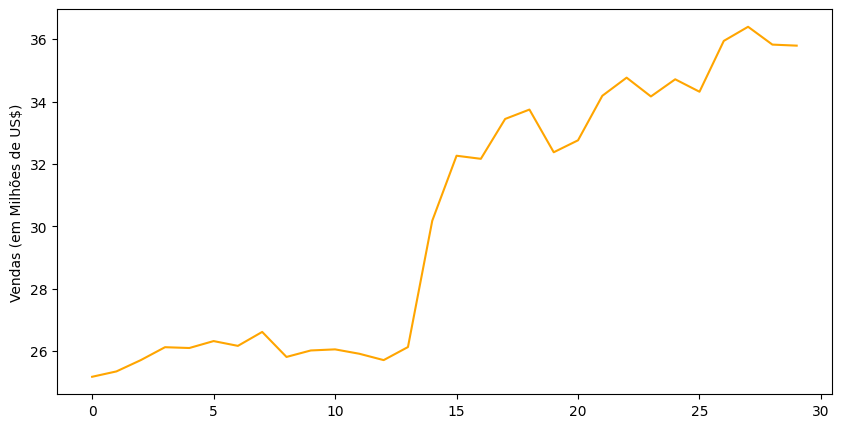

In [53]:
#Visualizando os 30 primeiros dias
y_pred = pd.DataFrame(y_pred)
y_pred30 = y_pred.head(30)

#Gráfico de linhas
plt.figure(figsize = (10,5))
plt.plot(y_pred30, c='orange')
plt.ylabel('Vendas (em Milhões de US$)')
plt.show()